## Import Libraries

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

## EDA


In [ ]:
data = pd.read_csv("/content/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data.shape

(2126, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


**On This Dataset**
**Cardiotocograms (CTGs)** are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

1. Normal
1. Suspect
1. Pathological

**Features**

* **'baseline value'** FHR baseline (beats per minute)
* **'accelerations'** Number of accelerations per second
* **'fetal_movement'** Number of fetal movements per second
* **'uterine_contractions'** Number of uterine contractions per second
* **'light_decelerations'** Number of light decelerations per second
* **'severe_decelerations'** Number of severe decelerations per second
* **'prolongued_decelerations'** Number of prolonged decelerations per second
* **'abnormal_short_term_variability'** Percentage of time with abnormal short term variability
* **'mean_value_of_short_term_variability'** Mean value of short term variability
* **'percentage_of_time_with_abnormal_long_term_variability'** Percentage of time with abnormal long term variability
* **'mean_value_of_long_term_variability'** Mean value of long term variability
* **'histogram_width'** Width of FHR histogram
* **'histogram_min' Minimum** (low frequency) of FHR histogram
* **'histogram_max' Maximum** (high frequency) of FHR histogram
* **'histogram_number_of_peaks'** Number of histogram peaks
* **'histogram_number_of_zeroes'** Number of histogram zeros
* **'histogram_mode'** Histogram mode
* **'histogram_mean'** Histogram mean
* **'histogram_median'** Histogram median
* **'histogram_variance'** Histogram variance
* **'histogram_tendency'** Histogram tendency

* **Target**
* **'fetal_health'** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

<Axes: xlabel='fetal_health', ylabel='count'>

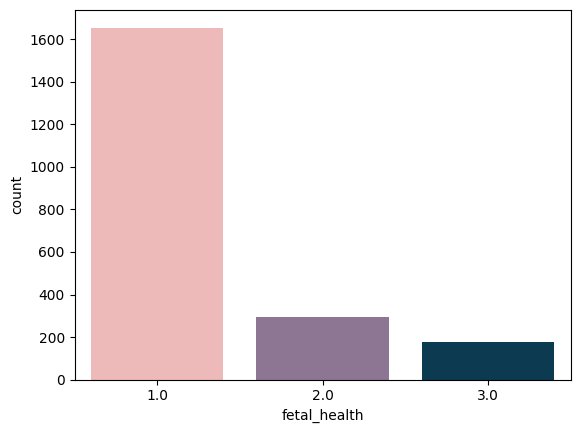

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

<Axes: >

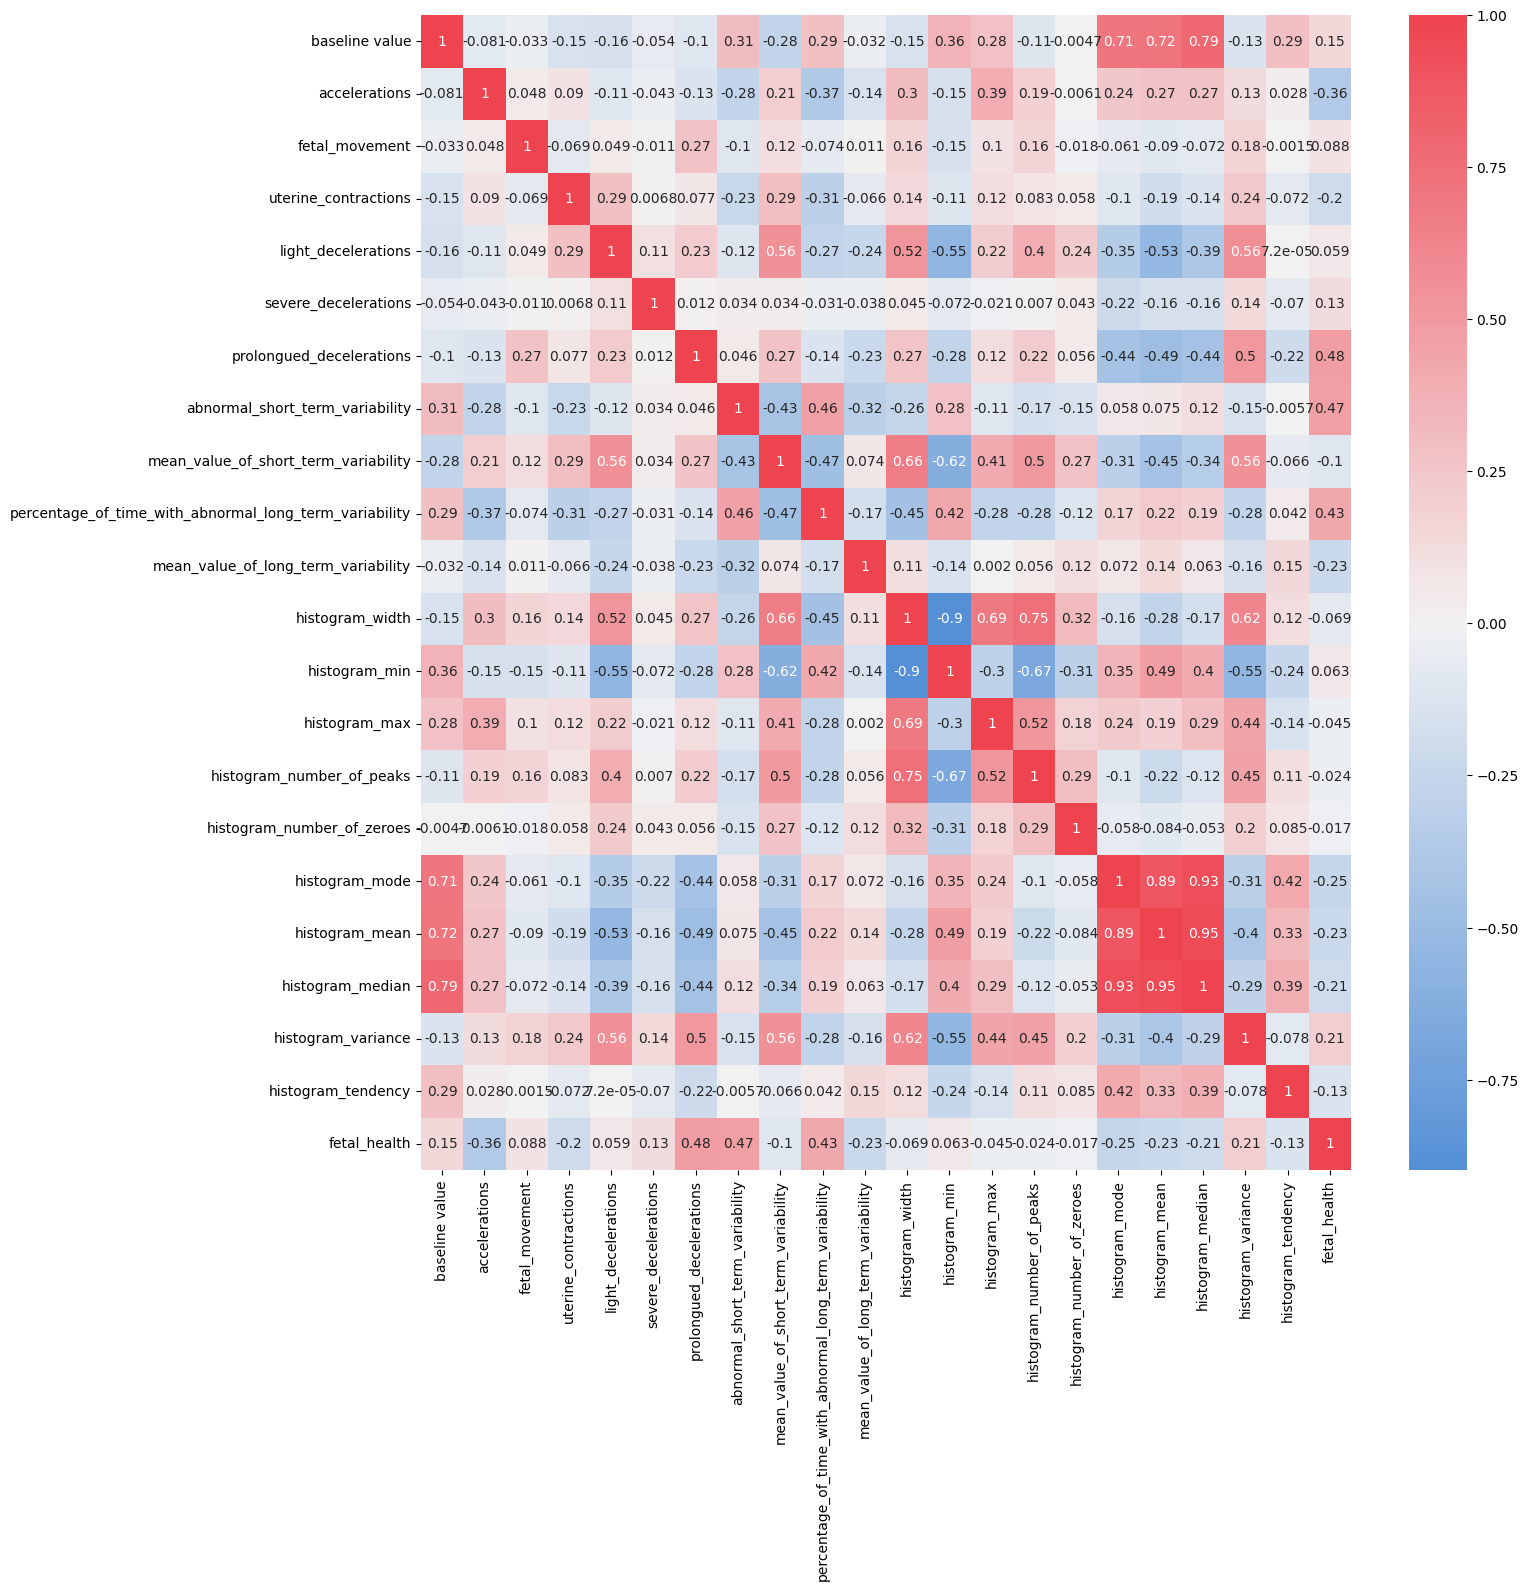

In [ ]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


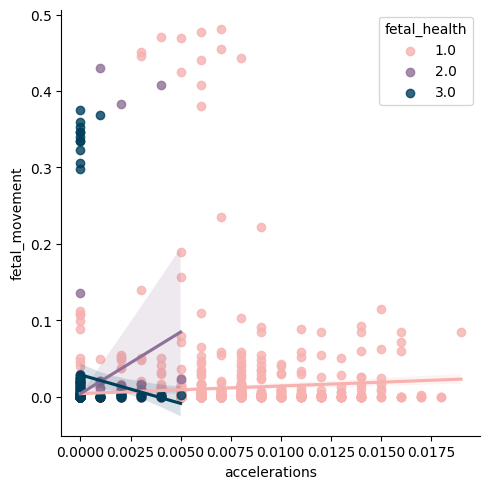

In [ ]:
sns.lmplot(data =data,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


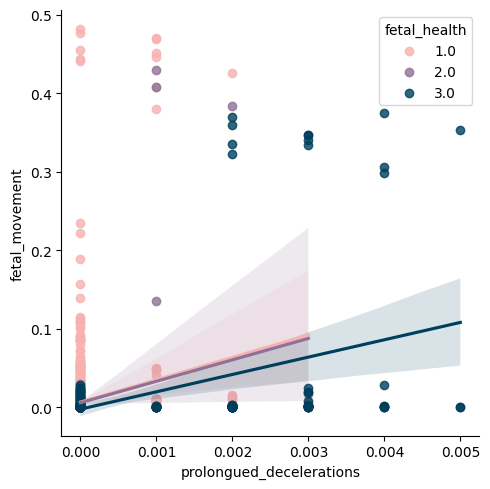

In [ ]:
sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


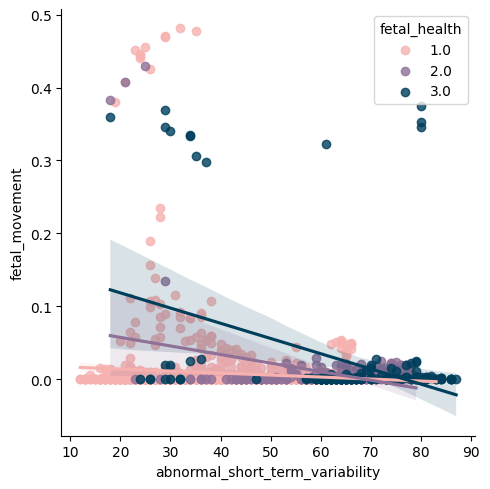

In [ ]:
sns.lmplot(data =data,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


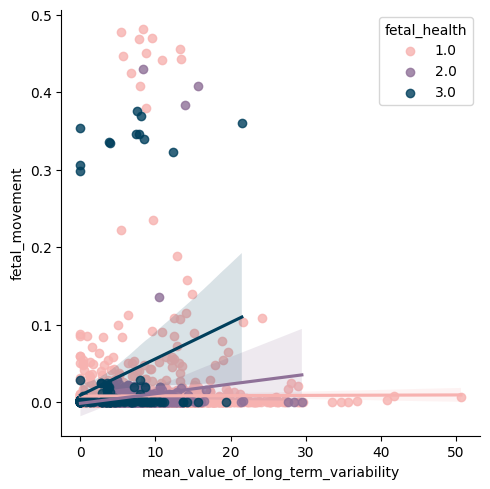

In [ ]:
sns.lmplot(data =data,x="mean_value_of_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

In [ ]:
# columns for detailed visualisation
cols=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']

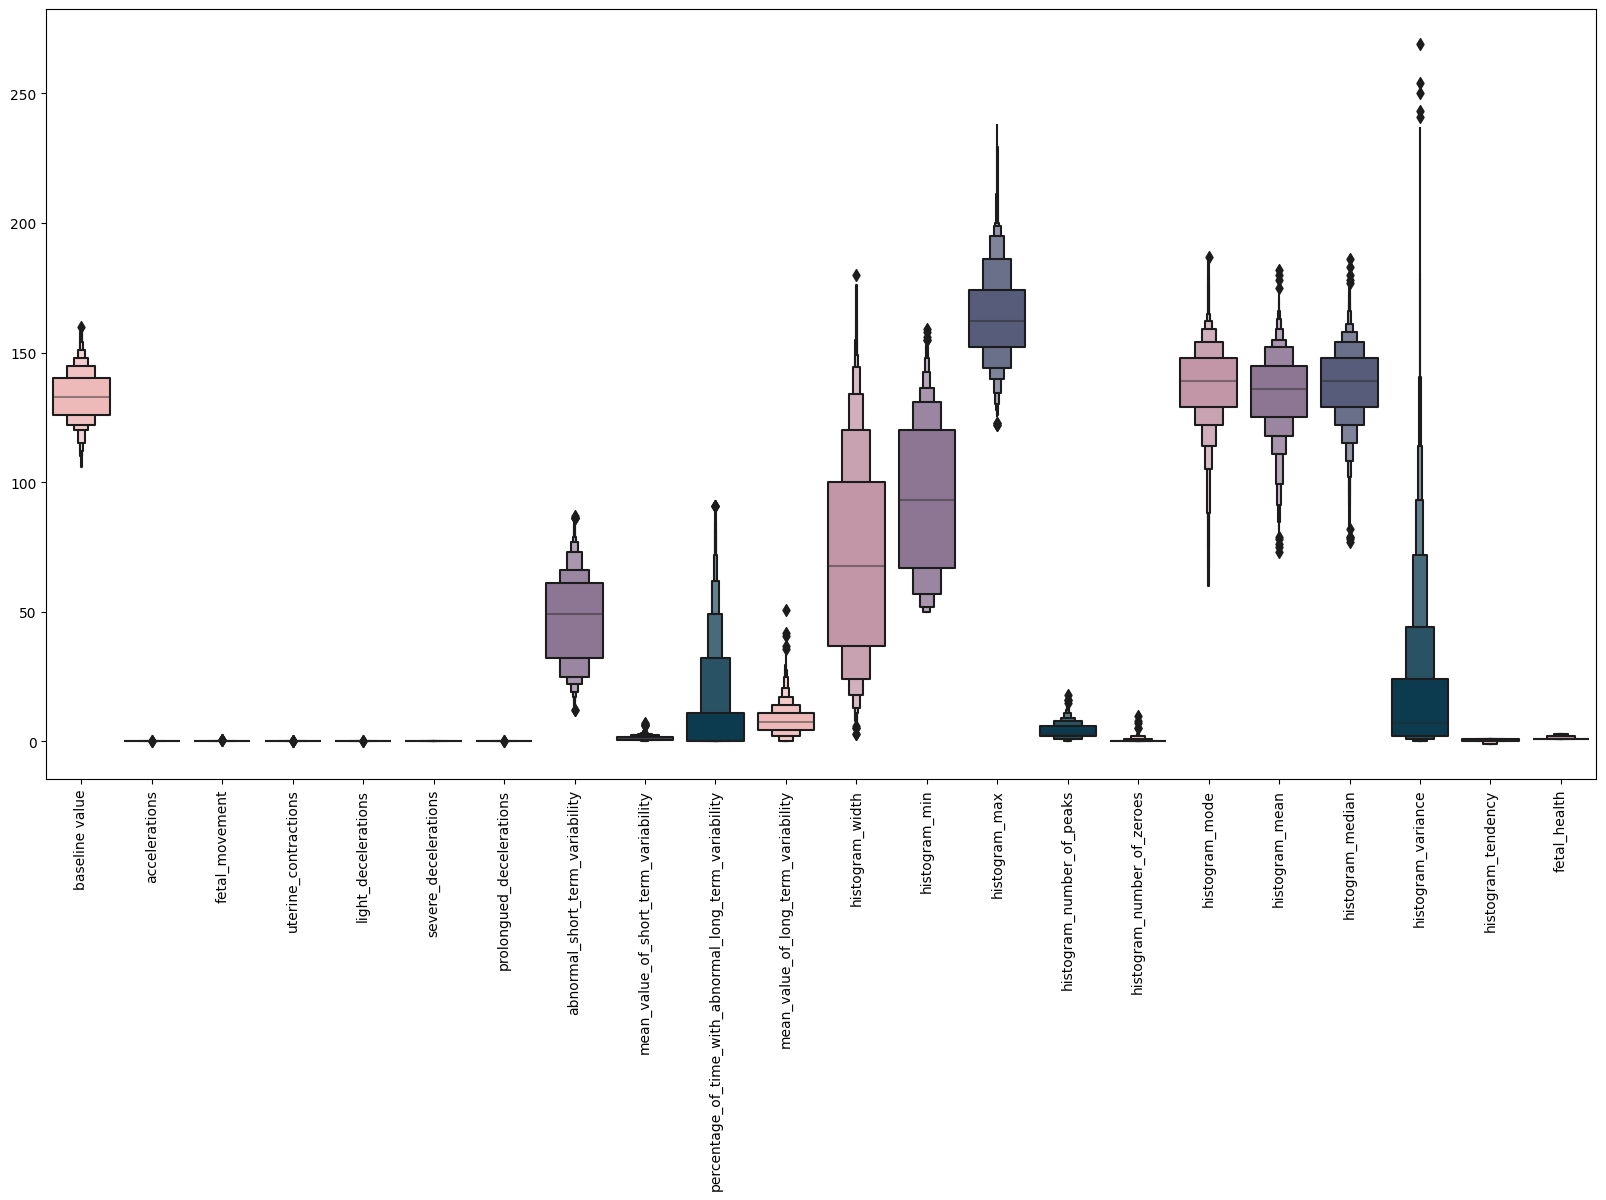

In [ ]:
    shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()

## Data Preprocessing

In [ ]:
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [ ]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
data.duplicated().sum()

13

In [ ]:
df2=data.copy()

In [ ]:
df2.drop_duplicates(inplace=True)

<Axes: xlabel='fetal_health', ylabel='count'>

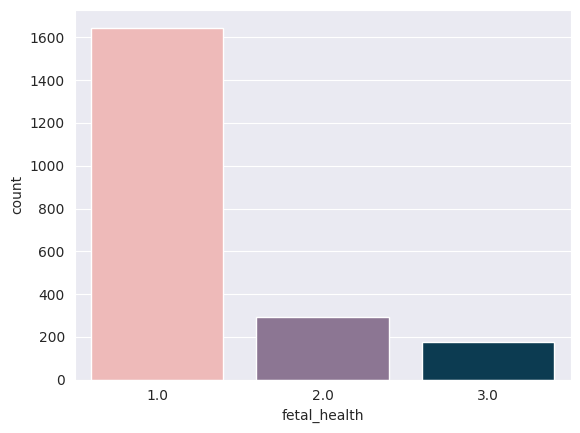

In [ ]:
sns.set_style("darkgrid")
sns.countplot(data=df2,x='fetal_health',palette=colours)

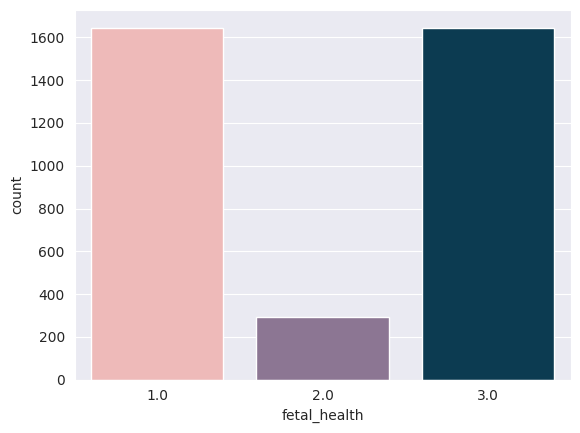

In [ ]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df2.drop('fetal_health', axis=1,inplace=False), df2['fetal_health'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
sns.countplot(x = oversampled['fetal_health'],palette=colours);

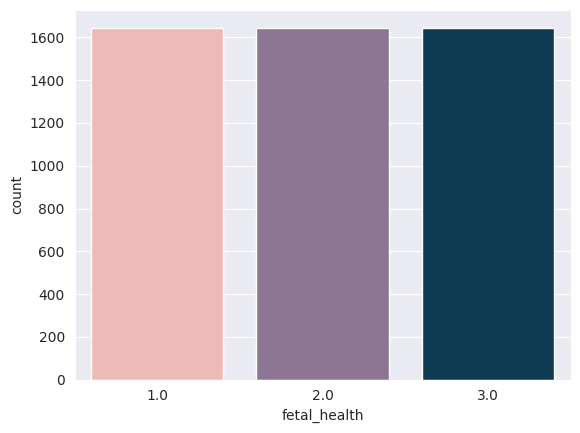

In [ ]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(oversampled.drop('fetal_health', axis=1,inplace=False), oversampled['fetal_health'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
sns.countplot(x = oversampled['fetal_health'],palette=colours);

In [ ]:
oversampled['fetal_health'].value_counts()

2.0    1646
1.0    1646
3.0    1646
Name: fetal_health, dtype: int64

In [ ]:
oversampled.head()

,fetal_health,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,2.0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,1.0,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,1.0,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,1.0,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,1.0,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [ ]:
oversampled.isna().sum()

fetal_health                                              0
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes              

In [ ]:
#finding outliers for feature3
#finding the 1st quartile
import numpy as np
def findoutliers(row):
    q1 = np.quantile(row, 0.25)

    # finding the 3rd quartile
    q3 = np.quantile(row, 0.75)

    med = np.median(row)

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers = row[(row <= lower_bound) | (row >= upper_bound)].count()
    print(row.name,'\n',outliers)
    print(upper_bound,lower_bound)


g=oversampled.apply(findoutliers)

fetal_health 
 0
6.0 -2.0
baseline value 
 7
164.5372811469997 107.67763131180017
accelerations 
 649
0.005 -0.003
fetal_movement 
 698
0.009195607877482609 -0.005517364726489566
uterine_contractions 
 4
0.013729440919352773 -0.006882401532254622
light_decelerations 
 444
0.00782396449023855 -0.004694378694143131
severe_decelerations 
 4938
0.0 0.0
prolongued_decelerations 
 4938
0.0 0.0
abnormal_short_term_variability 
 13
98.5 14.5
mean_value_of_short_term_variability 
 70
3.8999999999999995 -1.6999999999999997
percentage_of_time_with_abnormal_long_term_variability 
 173
80.19676016805732 -48.118056100834394
mean_value_of_long_term_variability 
 156
17.67993609877541 -4.927371013889317
histogram_width 
 0
219.7951161842118 -91.12180956629055
histogram_min 
 0
228.0 -36.0
histogram_max 
 72
206.89066388031904 117.45858733041725
histogram_number_of_peaks 
 24
13.209330376743214 -6.015550627905357
histogram_number_of_zeroes 
 1041
0.6459465338072545 -0.3875679202843527
histogram_mode 
 

In [ ]:
df_filtered = oversampled[(oversampled.light_decelerations > -0.004694378694143131) & (oversampled.light_decelerations < 0.00782396449023855)]

In [ ]:
df_filtered.shape

(4494, 22)

In [ ]:
df_filtered.columns

Index(['fetal_health', 'baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

# PCA

In [ ]:
np.mean(df_filtered)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


fetal_health                                                1.950823
baseline value                                            136.006646
accelerations                                               0.001637
fetal_movement                                              0.013224
uterine_contractions                                        0.003434
light_decelerations                                         0.001298
severe_decelerations                                        0.000002
prolongued_decelerations                                    0.000440
abnormal_short_term_variability                            56.500200
mean_value_of_short_term_variability                        1.101585
percentage_of_time_with_abnormal_long_term_variability     20.510520
mean_value_of_long_term_variability                         7.153873
histogram_width                                            62.470688
histogram_min                                              99.918632
histogram_max                     

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

# standardization
df_filtered.drop(['fetal_health'],axis=1)
scaled = scale.fit_transform(df_filtered)
print(scaled)

[[ 0.06183774 -1.64113278 -0.53447489 ... -0.96989874  1.63033612
   1.18917341]
 [-1.19562294 -0.41079422  1.42403333 ...  0.14945466 -0.21053597
  -0.44923402]
 [-1.19562294 -0.308266    0.44477922 ...  0.03162799 -0.18035774
  -0.44923402]
 ...
 [ 0.06183774  0.92268352 -0.53447489 ...  0.77833167 -0.57267474
  -0.44923402]
 [ 0.06183774  1.58666464 -0.53447489 ...  1.3277214  -0.57267474
   0.34054563]
 [ 0.06183774  0.455644   -0.53447489 ...  0.46827637 -0.47622216
   1.18917341]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2','principal component 3','principal component 4',
                          'principal component 5','principal component 6','principal component 7','principal component 8',
                          'principal component 9','principal component 10'])

In [ ]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)

out_sum = np.cumsum(pca.explained_variance_ratio_)
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.35573312 0.16842116 0.08550683 0.06122073 0.05060189 0.04600597
 0.04086612 0.03854096 0.03319634 0.02239755]
Cumulative Prop. Variance Explained:  [0.35573312 0.52415428 0.60966111 0.67088184 0.72148373 0.7674897
 0.80835582 0.84689677 0.88009312 0.90249067]


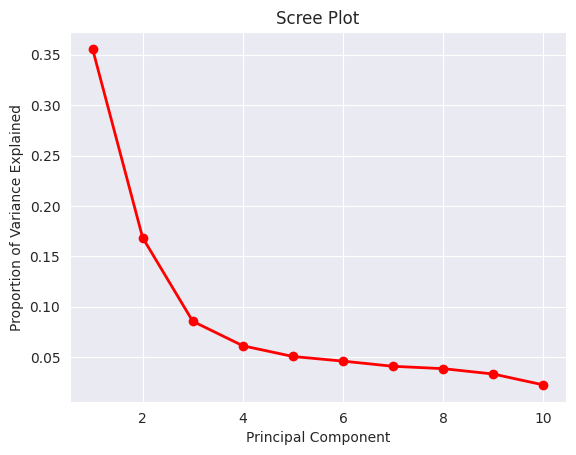

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
print(principalDf)

      principal component 1  principal component 2  principal component 3  \
0                 -0.057676              -2.139798               0.856602   
1                  2.383414               3.623712               0.500623   
2                  2.368524               3.540611               0.529578   
3                  2.353353               4.073416               0.863770   
4                  1.898036               4.186487               1.450360   
...                     ...                    ...                    ...   
4489              -2.767593              -1.984072              -0.011881   
4490               3.636861               5.520290              -4.958208   
4491              -3.034824              -0.991508              -0.314159   
4492              -3.666584              -0.153225              -0.981200   
4493              -0.478573               1.426647              -1.277662   

      principal component 4  principal component 5  principal component 6  

In [ ]:
feature_names=['fetal_health', 'baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9','PC10'], index=feature_names)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
fetal_health,0.132626,-0.747686,-0.503962,0.042044,-0.039355,0.025272,-0.007787,-0.031787,-0.049467,-0.080912
baseline value,-0.575450,0.206770,-0.655347,-0.196265,-0.105170,0.121522,-0.034628,-0.193113,-0.042840,-0.129921
accelerations,0.177701,0.558882,0.289429,-0.390905,0.135428,-0.086667,0.353905,0.364321,0.191937,-0.157799
fetal_movement,0.281754,-0.037504,-0.211628,0.091391,0.768704,0.115856,0.171279,-0.326584,0.218788,0.200276
uterine_contractions,0.464006,0.274634,0.248898,-0.297113,-0.385385,0.091562,-0.044300,-0.496800,0.029522,0.107010
light_decelerations,0.756509,-0.021965,-0.102041,-0.011315,-0.318935,-0.085146,0.097119,-0.137076,0.087118,0.285095
severe_decelerations,0.077529,-0.042147,0.034695,0.172689,-0.172686,0.897030,0.301721,0.166981,-0.045149,0.064930
prolongued_decelerations,0.749678,-0.391549,-0.249776,-0.130707,0.126135,0.053942,0.003556,-0.137107,-0.018074,-0.285159
abnormal_short_term_variability,-0.381478,-0.635866,-0.362687,-0.025150,-0.186082,-0.120042,0.053886,0.183213,-0.148012,0.031957
mean_value_of_short_term_variability,0.861912,0.207669,0.005010,-0.067633,-0.108315,-0.028006,-0.004210,-0.092008,-0.023171,-0.000472


# Model Selection

In [ ]:
#assigning values to features as X and target as y
X=principalDf
y=df_filtered["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
principal component 1,4494.0,2.529747e-16,1.000111,-1.497598,-0.783151,-0.309314,0.570787,3.329531
principal component 2,4494.0,-1.770823e-16,1.000111,-2.503868,-0.792207,-0.024953,0.725772,3.904935
principal component 3,4494.0,6.577343e-16,1.000111,-3.869072,-0.698247,-0.074407,0.615998,3.894868
principal component 4,4494.0,-3.794621e-17,1.000111,-3.488254,-0.699432,0.002826,0.612375,5.669957
principal component 5,4494.0,1.422983e-16,1.000111,-5.024681,-0.419364,-0.000628,0.283129,6.092775
principal component 6,4494.0,2.687856e-17,1.000111,-1.233767,-0.338377,-0.049169,0.266195,27.682257
principal component 7,4494.0,-5.691931e-17,1.000111,-7.554801,-0.565602,-0.001108,0.551316,10.711492
principal component 8,4494.0,6.324368e-17,1.000111,-4.319998,-0.637786,-0.002309,0.630489,4.974360
principal component 9,4494.0,5.059494e-17,1.000111,-5.304661,-0.574803,-0.070039,0.510812,9.905895
principal component 10,4494.0,2.055420e-17,1.000111,-4.065679,-0.557698,0.021737,0.541167,5.860112


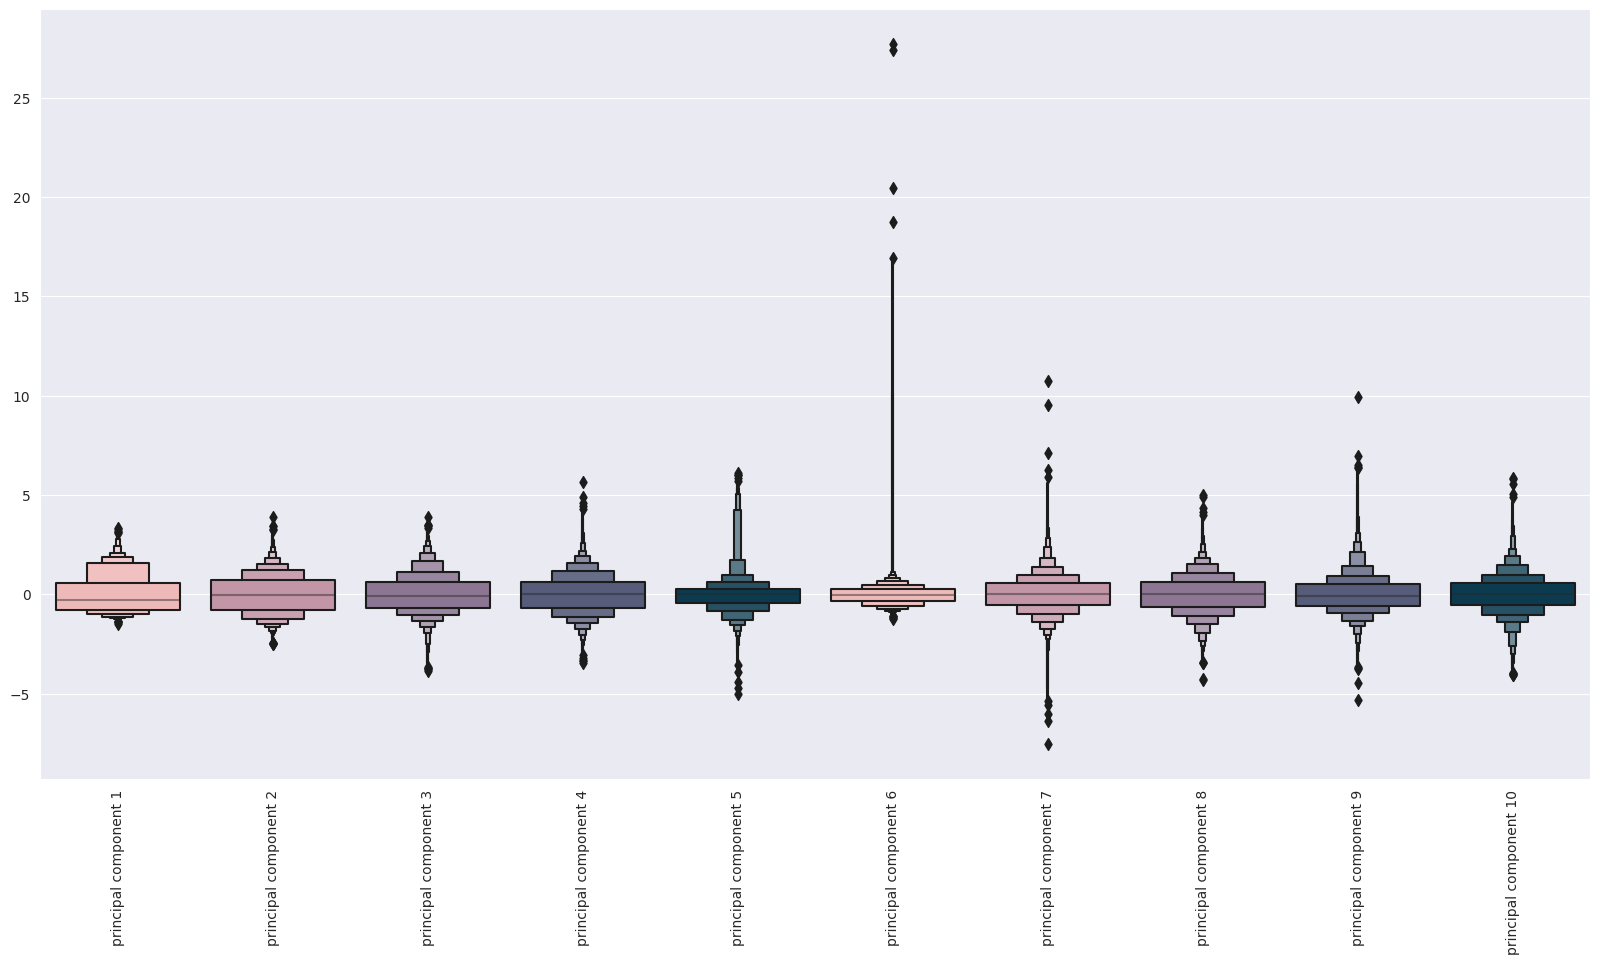

In [ ]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
clf = classifier.fit(X_train,y_train)

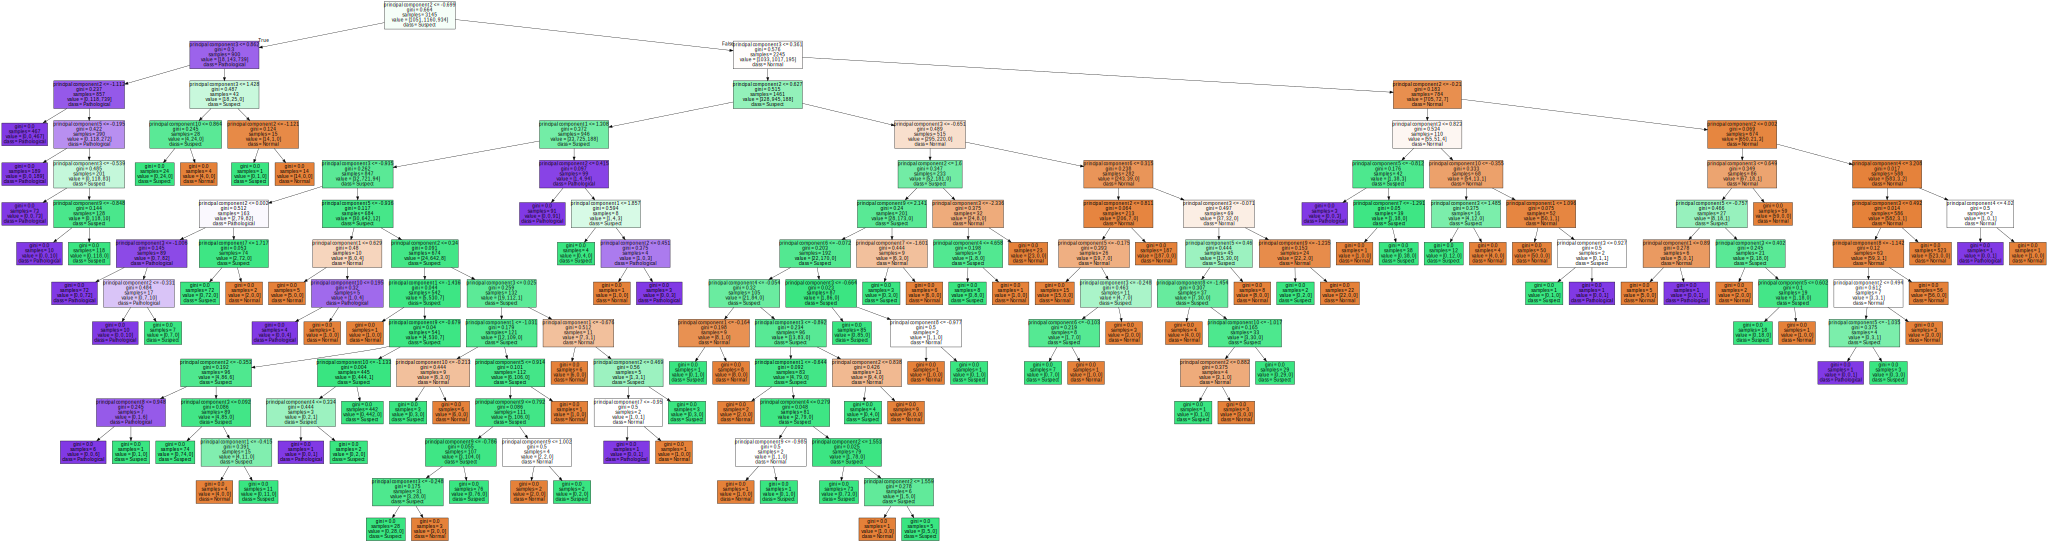

In [ ]:
import graphviz
from sklearn import tree

f_names = principalDf.columns
t_names = ['Normal','Suspect','Pathological']

# DOT data

dot_data = tree.export_graphviz(classifier, out_file=None, feature_names = f_names, class_names= t_names, filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
predictions=classifier.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.971830985915493

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       486
         2.0       0.95      0.97      0.96       481
         3.0       0.99      0.98      0.99       382

    accuracy                           0.97      1349
   macro avg       0.97      0.97      0.97      1349
weighted avg       0.97      0.97      0.97      1349



<Axes: >

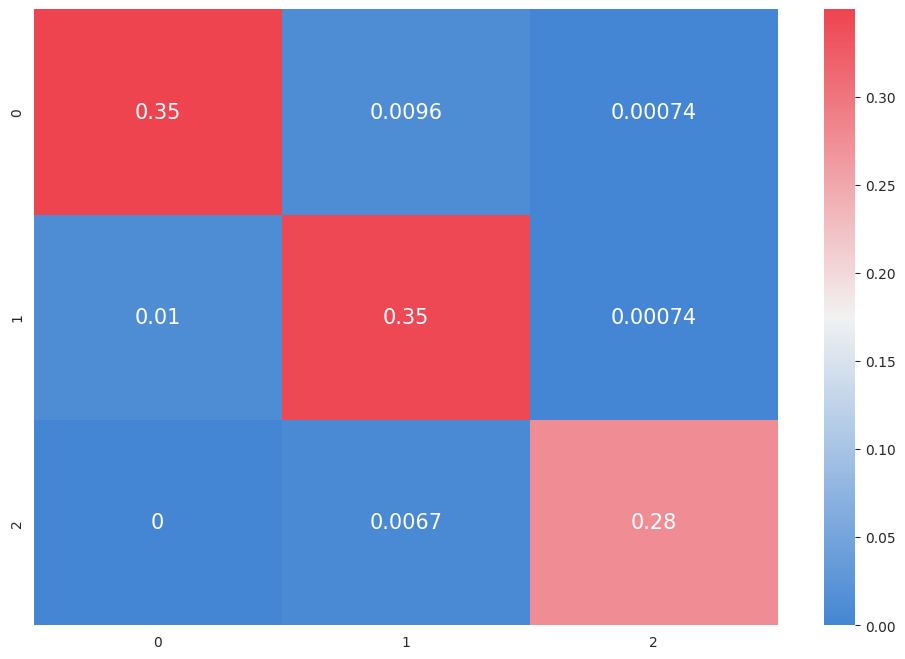

In [ ]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

## Random Forest

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.9866567828020756

In [ ]:
num_trees = RF_model.n_estimators
print(num_trees)

100


In [ ]:
print(predictions)

[1. 2. 2. ... 1. 1. 2.]


In [ ]:
y_test=np.array(y_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99       486
         2.0       0.97      1.00      0.98       481
         3.0       1.00      0.99      0.99       382

    accuracy                           0.99      1349
   macro avg       0.99      0.99      0.99      1349
weighted avg       0.99      0.99      0.99      1349



<Axes: >

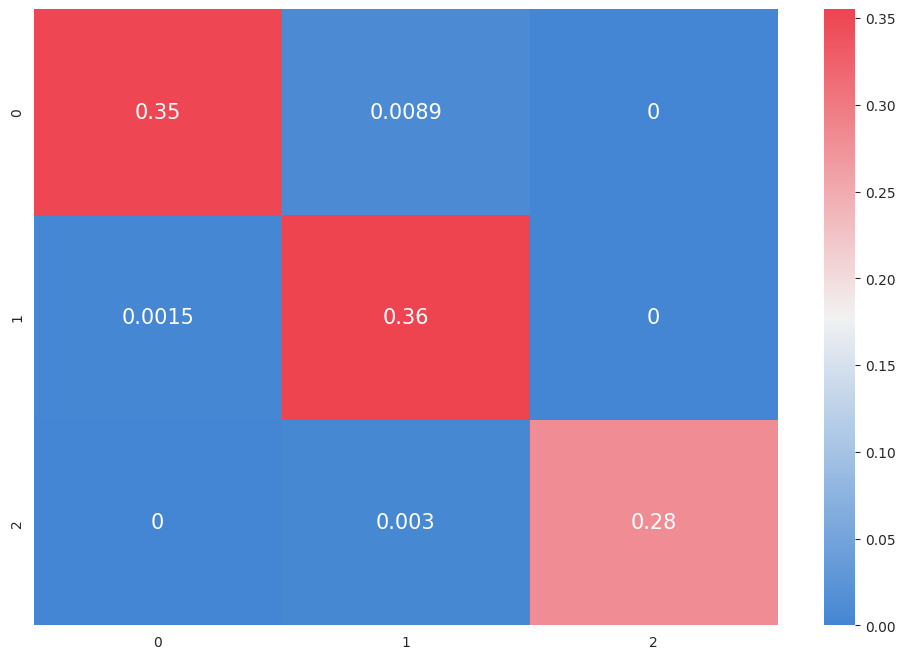

In [ ]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

# Model Selection without PCA

In [ ]:
xdf2=df_filtered.drop(['fetal_health'],axis=1)
ydf2=df_filtered['fetal_health']

In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(xdf2,ydf2,test_size=0.3,random_state=42)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
clf = classifier.fit(X_train,y_train)

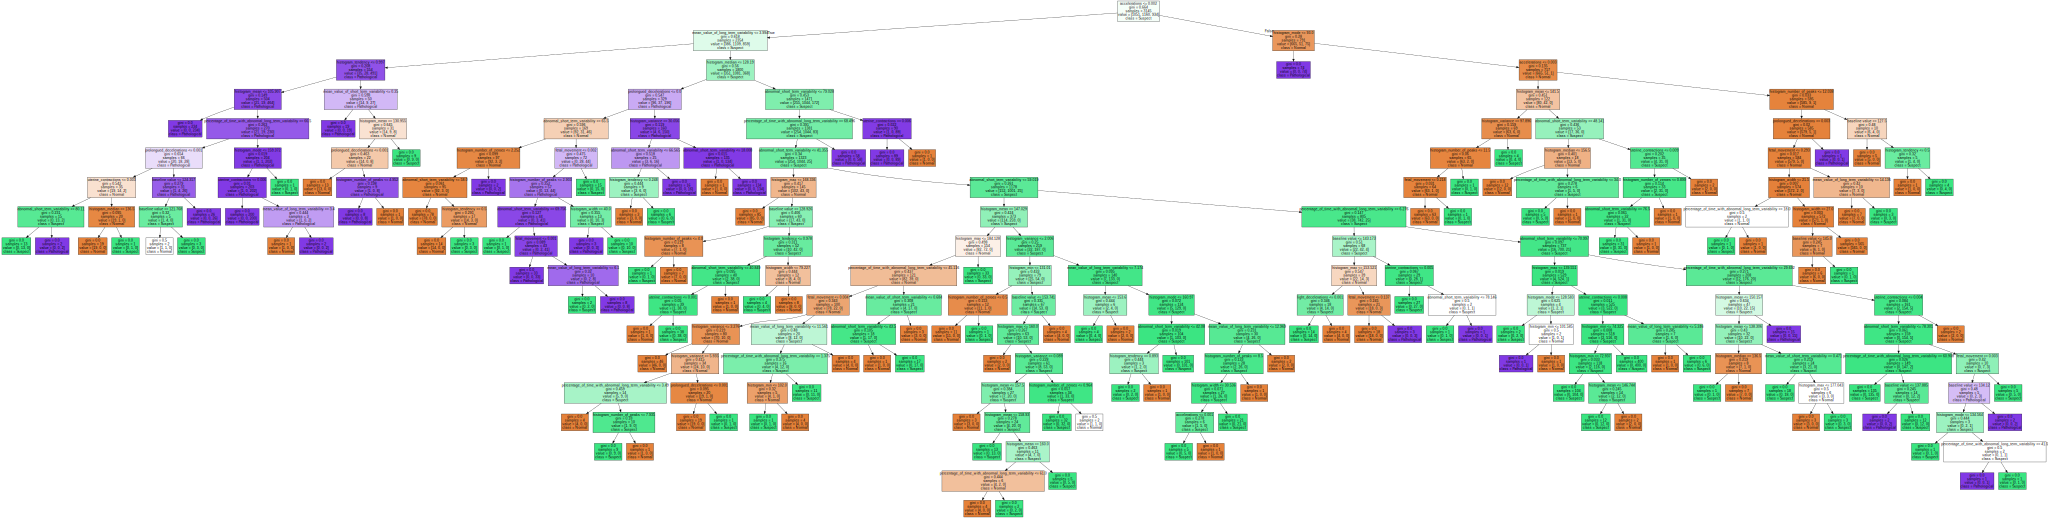

In [ ]:
import graphviz
from sklearn import tree

f_names = xdf2.columns
t_names = ['Normal','Suspect','Pathological']

# DOT data

dot_data = tree.export_graphviz(classifier, out_file=None, feature_names = f_names,class_names=t_names, filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
predictions=classifier.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.9636767976278725

<Axes: >

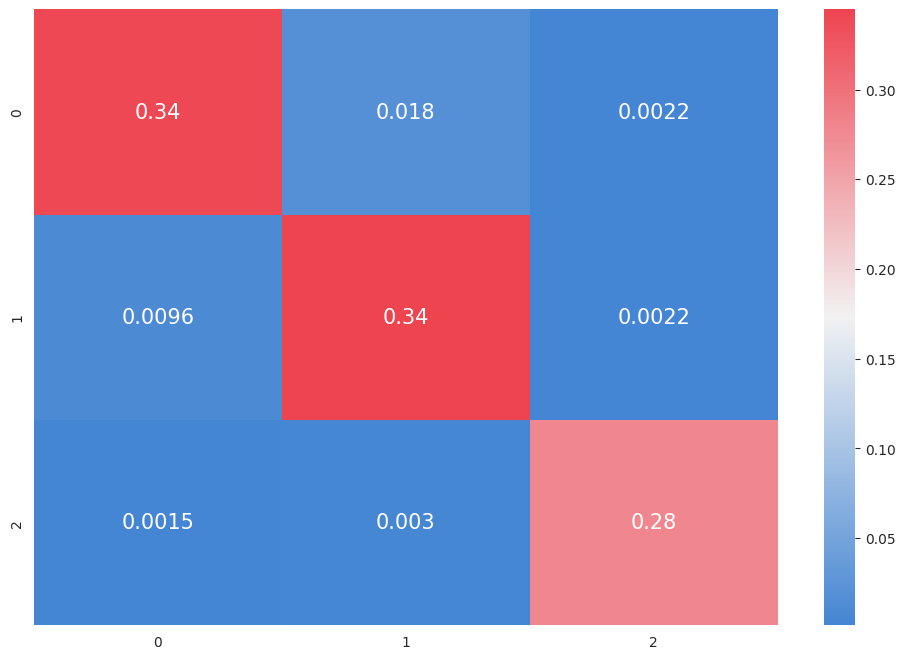

In [ ]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

## Random Forest

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.9807264640474426

In [ ]:
print(predictions)

[1. 2. 2. ... 1. 1. 2.]


In [ ]:
y_test=np.array(y_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.99      0.97      0.98       486
         2.0       0.96      0.99      0.98       481
         3.0       0.99      0.99      0.99       382

    accuracy                           0.98      1349
   macro avg       0.98      0.98      0.98      1349
weighted avg       0.98      0.98      0.98      1349



<Axes: >

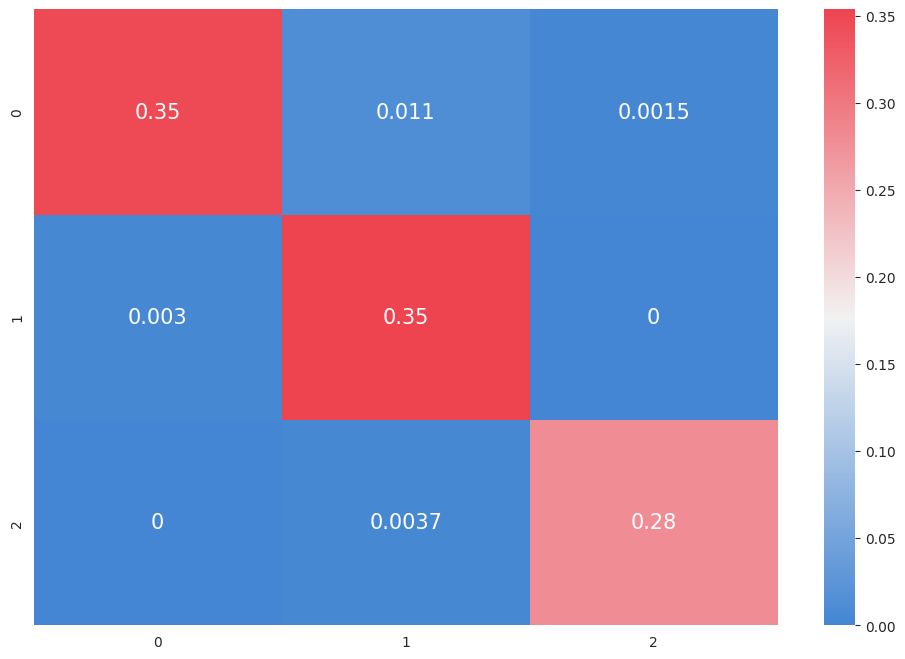

In [ ]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})